## 회귀 모델

In [15]:
import numpy as np
import pandas as pd

# boston 집값 데이터셋 불러오기
from sklearn.datasets import load_boston

# https://financedata.github.io/posts/display-all-values-in-cell-jupyter-notebook.html
# Q: Jupyter Notebook 셀에서 마지막 값 하나만이 아니라 중간에 모든 값을 차례로 출력하고 싶습니다.
# A: print(), IPython.display를 써서 매번 출력하거나 InteractiveShell의 옵션을 지정합니다.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = load_boston()

In [4]:
# 항상 데이터 특성 먼저 파악하기
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# 안쪽에 데이타 값만 불러 올 수 있음
data['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
# 데이터셋을 dataframe 에 불러온다. column 명을 가져오려면 feature_name
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
# 정답 데이터는 우리가 target 이라고 항상 부름
# 실제 집값 데이터
data['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
# 집값에 중위값에 집어늠?
# 새로운 컬럼이 만들어 져야 함 - 집값의 중위값? 이라함. 
df['MEDV'] = data['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


[01]  CRIM 자치시(town) 별 1인당 범죄율 <br>
[02]  ZN 25,000 평방피트를 초과하는 거주지역의 비율  <br>
[03]  INDUS 비소매상업지역이 점유하고 있는 토지의 비율  <br>
[04]  CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) <br> 
[05]  NOX 10ppm 당 농축 일산화질소  <br>
[06]  RM 주택 1가구당 평균 방의 개수  <br>
[07]  AGE 1940년 이전에 건축된 소유주택의 비율 <br> 
[08]  DIS 5개의 보스턴 직업센터까지의 접근성 지수  <br>
[09]  RAD 방사형 도로까지의 접근성 지수  <br>
[10]  TAX 10,000 달러 당 재산세율  <br>
[11]  PTRATIO 자치시(town)별 학생/교사 비율 <br> 
[12]  B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함. <br> 
[13]  LSTAT 모집단의 하위계층의 비율(%)  <br>
[14]  MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

## 데이터셋 분할

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# x = df.drop('MEDV',1)
# y = df['MEDV']
# test_size = 0.25 (default)
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV',1), df['MEDV'], test_size = 0.2, random_state = 123)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [13]:
# 신경써야 할 것은 index 값
# 테스트 사이즈 하면 모든 데이터가 셔플이 됨
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
441,9.72418,0.0,18.10,0.0,0.7400,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
172,0.13914,0.0,4.05,0.0,0.5100,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
95,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
54,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80


In [14]:
# 그래서 인덱스를 가지런히 하기 위해서
# 리셋 인덱스
x_train = x_train.reset_index(drop=True)
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
1,9.72418,0.0,18.10,0.0,0.7400,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
2,0.13914,0.0,4.05,0.0,0.5100,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
3,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
4,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80


In [16]:
# all data should be reset
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
x_train.head()
x_test.head()
y_train.head()
y_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
1,9.72418,0.0,18.10,0.0,0.7400,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
2,0.13914,0.0,4.05,0.0,0.5100,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
3,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
4,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,51.13580,0.0,18.10,0.0,0.5970,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
1,0.05735,0.0,4.49,0.0,0.4490,6.630,56.1,4.4377,3.0,247.0,18.5,392.30,6.53
2,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
3,12.04820,0.0,18.10,0.0,0.6140,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10
4,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56


0    48.5
1    17.1
2    23.1
3    28.4
4    18.9
Name: MEDV, dtype: float64

0    15.0
1    26.6
2    45.4
3    20.8
4    34.9
Name: MEDV, dtype: float64

## 평가지표

선형회귀에서 자주 사용하는 평가지표
1. MSE(Mean Sqared Error)  <br>

   예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값
    <br><br>

    ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

    <br><br>
2. MAE(Mean Absolute Error) <br>
   예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값
   <br><br>
   $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$
  
  <br><br>
3.RMSE(Root Mean Squared Error)<br>
  예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 뒤 루트를 씌운 값
  <br><br>
    $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

## 평가 지표를 사용해보기

In [17]:
# 사용 예
pred = np.array([3,4,5])
target = np.array([2,3,4])

In [20]:
# 제곱: ** , ^ 이거 하니까 결과 3.0 나옴.. 왜지?
def cal_MSE(pred, target):
    return ((pred - target)**2).mean()

cal_MSE(pred, target)

1.0

In [21]:
def cal_MAE(pred, target):
    return np.abs(pred - target).mean()

cal_MAE(pred, target)

1.0

In [22]:
def cal_RMSE(pred, target):
    return np.sqrt((pred - target)**2).mean()

cal_RMSE(pred, target)

1.0

In [24]:
# scikit-learn 에서 제공하는 평가지표 메소드
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
# MSE
cal_MSE(pred,target), mean_squared_error(pred,target)

(1.0, 1.0)

In [26]:
# MAE
cal_MAE(pred, target), mean_absolute_error(pred, target)

(1.0, 1.0)

In [27]:
# RMSE --> (squared = False)
# 전체 # 처리 = ctrl + /

# squaredbool, default=True
# If True returns MSE value, if False returns RMSE value.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

cal_RMSE(pred, target), mean_squared_error(pred, target, squared = False)

(1.0, 1.0)

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
# model 정의
# n_jobs = -1 이면 CPU 를 모두 사용
model = LinearRegression(n_jobs=-1)

In [34]:
# training model
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [35]:
prediction = model.predict(x_test)

In [36]:
prediction

array([16.00330023, 27.79447431, 39.26769478, 18.32613556, 30.45487494,
       37.67724152, 25.28488162, 10.22712629, 14.82537224, 31.99311717,
       28.98969206, 19.17253244, 13.77310754, 31.69400164, 16.51057791,
       21.43127305, 20.36911404, 37.50141667, 18.10978575, 15.81266015,
       13.80299258, 24.48033748, 32.93389583, 39.42064642, 31.48120599,
       22.36455033, 17.60924332, 20.94828713, 23.4130816 , 20.38151773,
       25.79402412, 34.04473076, 15.11357401, 21.91097373, 24.05551144,
       34.58404676, 29.34099148, 18.2535874 , 13.95709552, 38.23179838,
       31.0049878 , 18.74606681, 19.72857941, 40.31936227,  8.19674997,
       27.30047872, 19.28830095, 25.58425976, 15.4961129 , 25.86694355,
       34.87324014, 24.25453569, 19.61772711, 12.47561892, 24.42804102,
       17.9505124 ,  9.69615055,  2.3378285 , 31.80311538, 13.65050017,
       20.05798605, 22.5516387 , 20.0245067 , 17.85753966, 25.0631636 ,
       27.19590817, 25.97988145, 22.09920138, 24.66187205, 30.39

In [38]:
prediction.shape, y_test.shape

((102,), (102,))

In [37]:
mean_squared_error(prediction, y_test)

28.192485758469548

## 모델 성능 확인(그래프)

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
my_predictions = {}

In [57]:
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

In [58]:
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

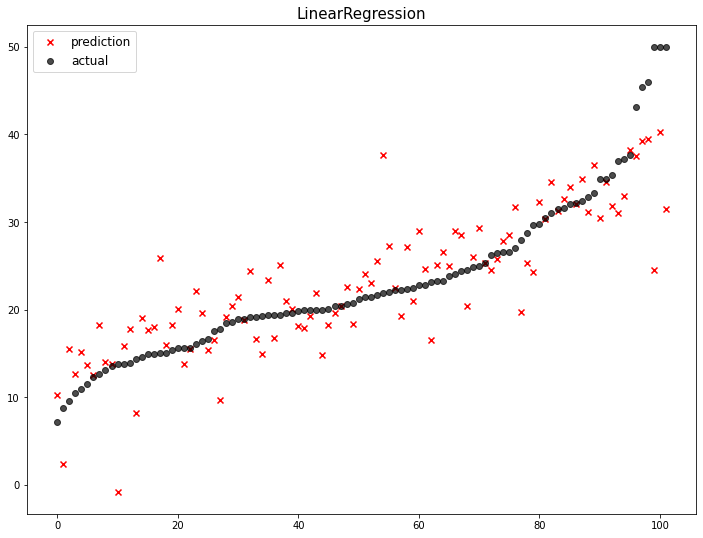

              model        mse
0  LinearRegression  28.193564


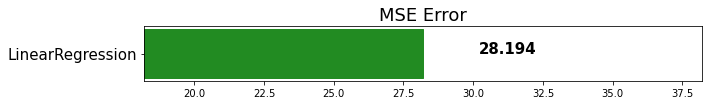

In [59]:
mse_eval('LinearRegression', pred, y_test)

## 규제를 추가(Regularization)

학습이 과대적합 되는 것을 방지하고자 penalty 부여  

1. L1 Regularization - 라쏘(Lasso) 규제 : alpha 값을 어떻게 설정하느냐 : 절대치<br><br>
$Error=MSE+α|w|$ <br><br>


2. L2 Regularization - 릿지 (Ridge) 규제 : alpha 값을 어떻게 설정하느냐 : 제곱 <br><br>
$Error=MSE+αw^2$ <br><br>

In [48]:
from sklearn.linear_model import Ridge

In [49]:
# 값이 커질수록 큰 규제
alphas = [100, 10, 1, 0.1, 0.01, 0.001]

Ridge(alpha=100)

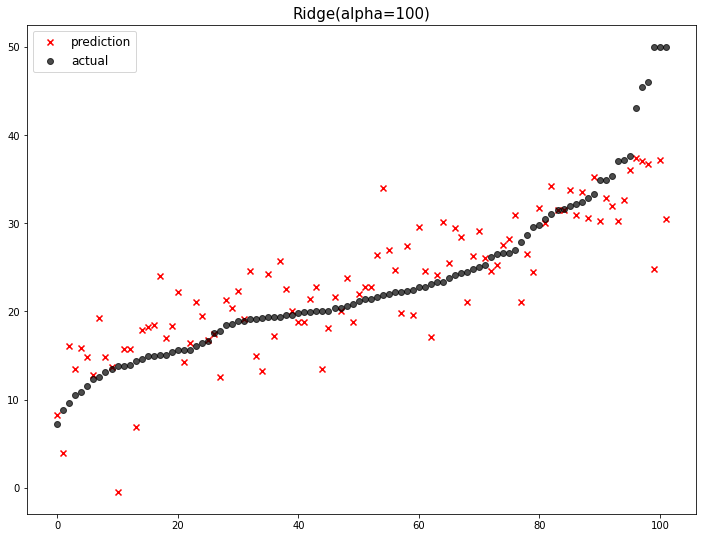

              model        mse
0  Ridge(alpha=100)  29.201438


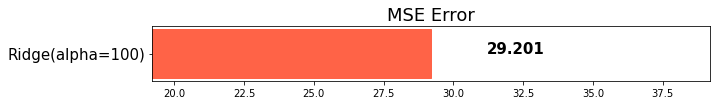

Ridge(alpha=10)

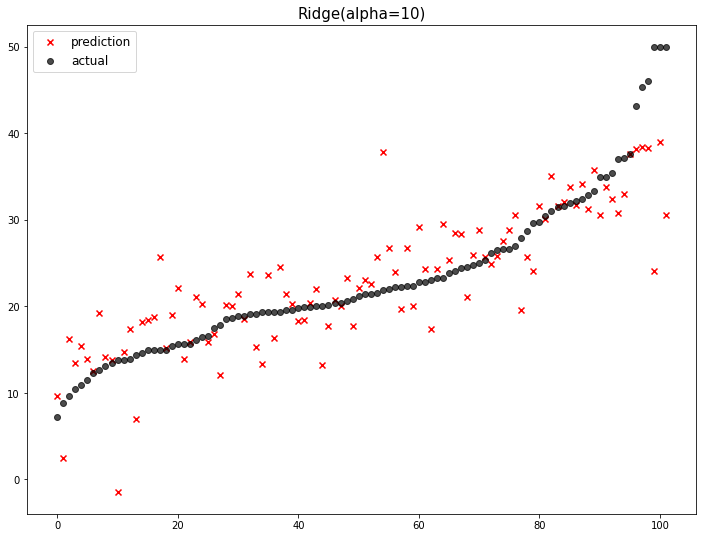

              model        mse
0   Ridge(alpha=10)  29.799160
1  Ridge(alpha=100)  29.201438


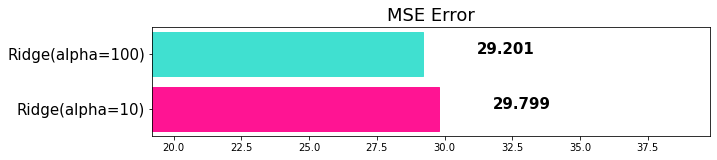

Ridge(alpha=1)

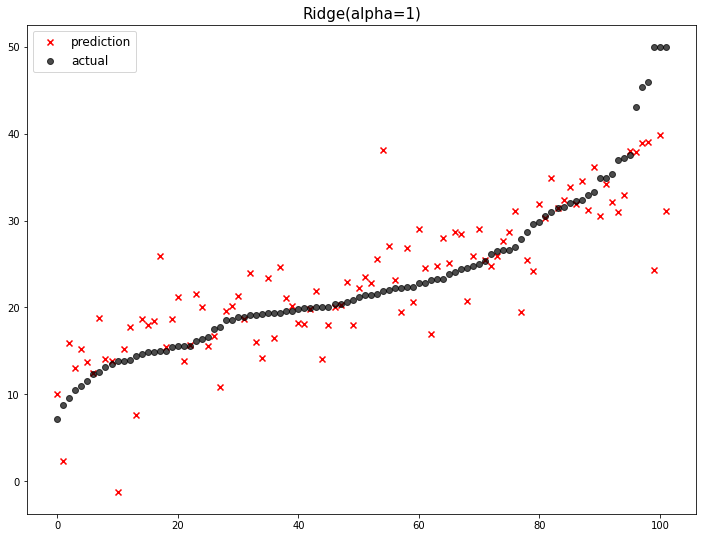

              model        mse
0   Ridge(alpha=10)  29.799160
1  Ridge(alpha=100)  29.201438
2    Ridge(alpha=1)  28.932170


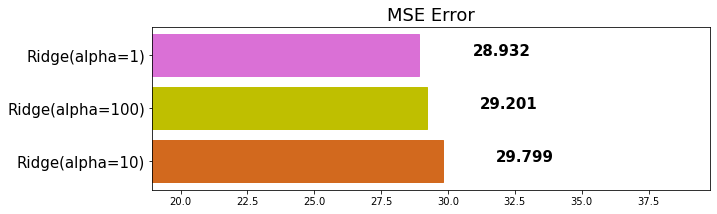

Ridge(alpha=0.1)

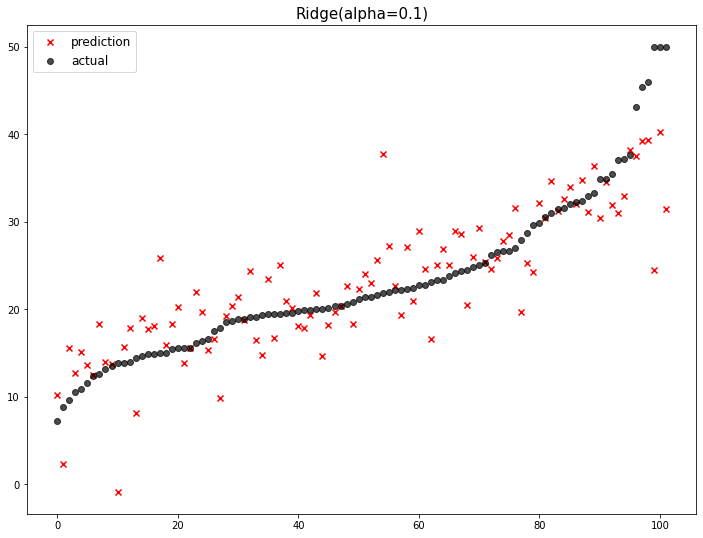

              model        mse
0   Ridge(alpha=10)  29.799160
1  Ridge(alpha=100)  29.201438
2    Ridge(alpha=1)  28.932170
3  Ridge(alpha=0.1)  28.296407


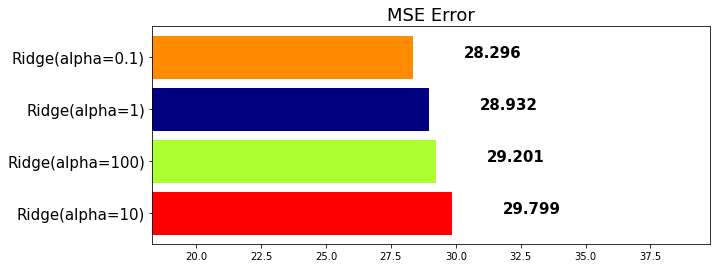

Ridge(alpha=0.01)

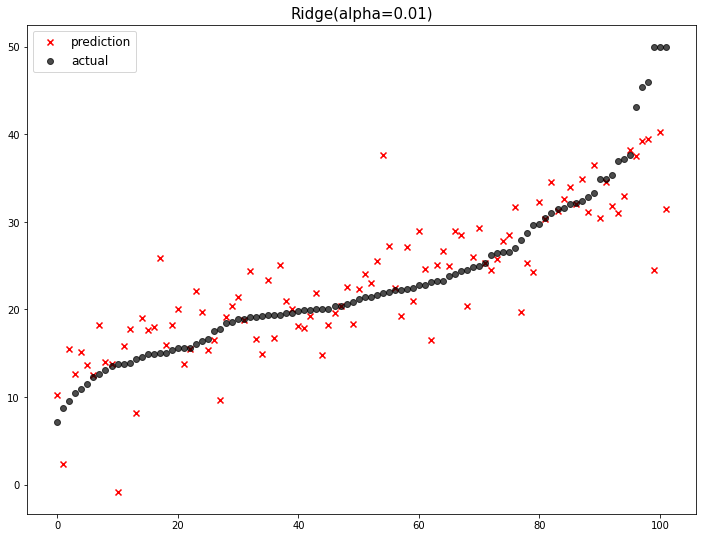

               model        mse
0    Ridge(alpha=10)  29.799160
1   Ridge(alpha=100)  29.201438
2     Ridge(alpha=1)  28.932170
3   Ridge(alpha=0.1)  28.296407
4  Ridge(alpha=0.01)  28.203234


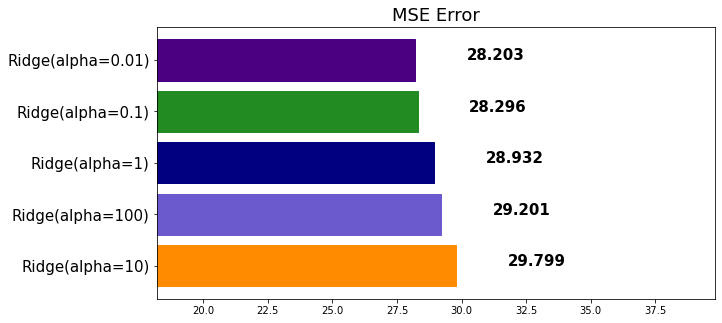

Ridge(alpha=0.001)

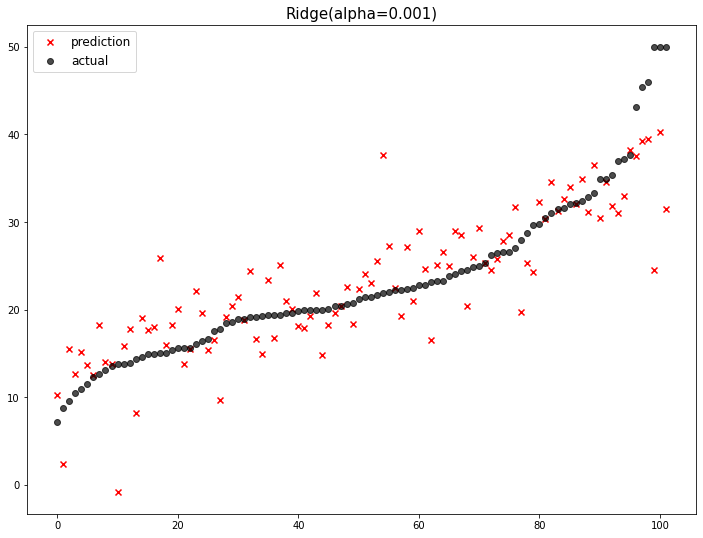

                model        mse
0     Ridge(alpha=10)  29.799160
1    Ridge(alpha=100)  29.201438
2      Ridge(alpha=1)  28.932170
3    Ridge(alpha=0.1)  28.296407
4   Ridge(alpha=0.01)  28.203234
5  Ridge(alpha=0.001)  28.193564


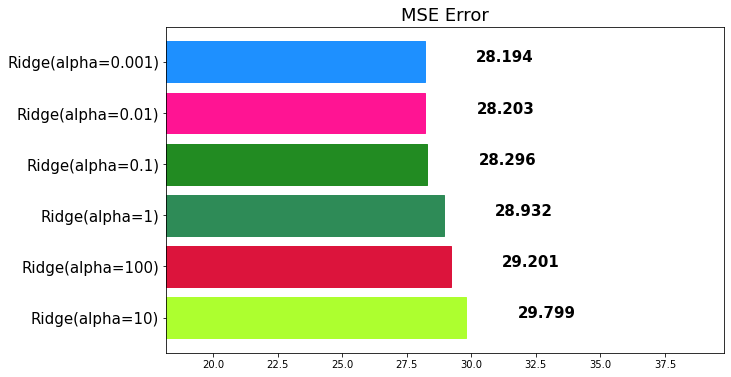

In [50]:
# linear regression 보다 L2 규제가 별 효과 없음. 에러값이 더 크게 나옴. 좋은 결과가 아님. 
for alpha in alphas:
    # define model
    ridge = Ridge(alpha=alpha)
    # train model
    ridge.fit(x_train, y_train)
    # predict model
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [51]:
# x값 parameter 안에 들어가는 것들 . 밑에 x_train. columns 에 해당하는 parameters 값들임. 
# 즉 각각의 w 값들임. 
# 데이터셋의 columns에 해당하는 값에 대응되는 parameters
ridge.coef_

array([-9.87883529e-02,  4.75032654e-02,  6.68986298e-02,  1.26924439e+00,
       -1.54572199e+01,  4.31983129e+00, -9.92279974e-04, -1.36579753e+00,
        2.84489625e-01, -1.27542867e-02, -9.13344007e-01,  7.22611272e-03,
       -5.43802090e-01])

In [52]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

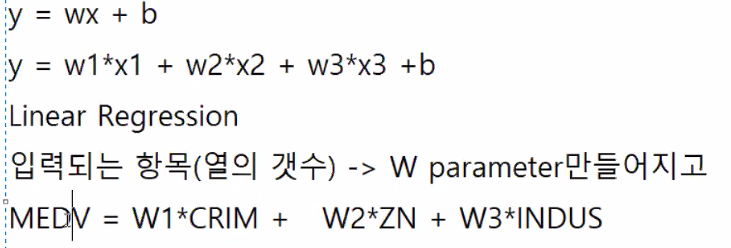

In [53]:
# coef_ Weight 값을 그래프로 표현
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

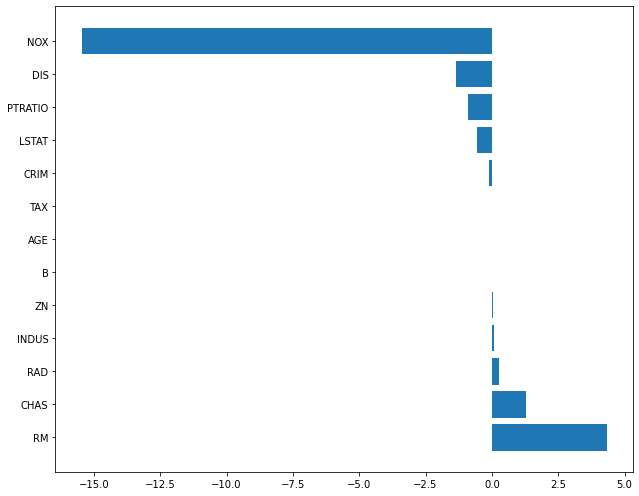

In [54]:
plot_coef(x_train.columns, ridge.coef_)

LinearRegression(n_jobs=-1)

((102,), (102,))

28.192485758469548

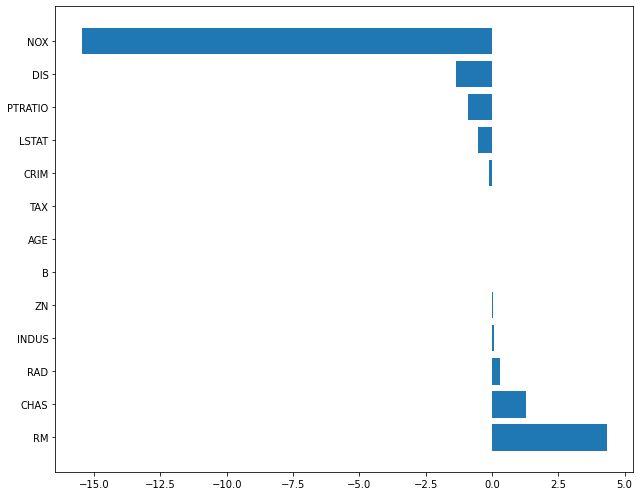

In [81]:
from sklearn.linear_model import LinearRegression

# model정의
# n_jobs=-1이면 CPU를 모두 사용
model = LinearRegression(n_jobs=-1)

# 모델 학습
model.fit(x_train,y_train)

pred = model.predict(x_test)

pred.shape, y_test.shape

mean_squared_error(pred,y_test)
plot_coef(x_train.columns, model.coef_)

## L1(Lasso) Regularization

In [60]:
from sklearn.linear_model import Lasso

In [78]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

Lasso(alpha=100)

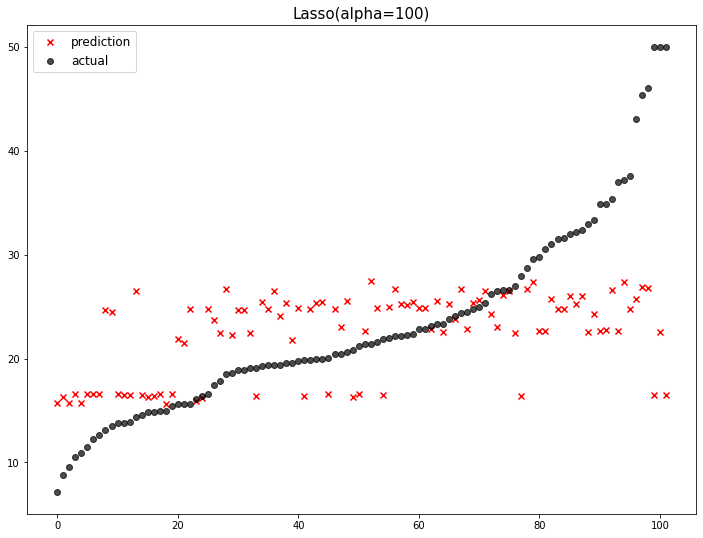

                model        mse
0    Lasso(alpha=100)  71.662293
1     Lasso(alpha=10)  42.977348
2    Lasso(alpha=0.1)  30.888208
3      Lasso(alpha=1)  30.699416
4   Lasso(alpha=0.01)  28.642732
5  Lasso(alpha=0.001)  28.233601
6    LinearRegression  28.193564
7      Standard Ridge  28.192493


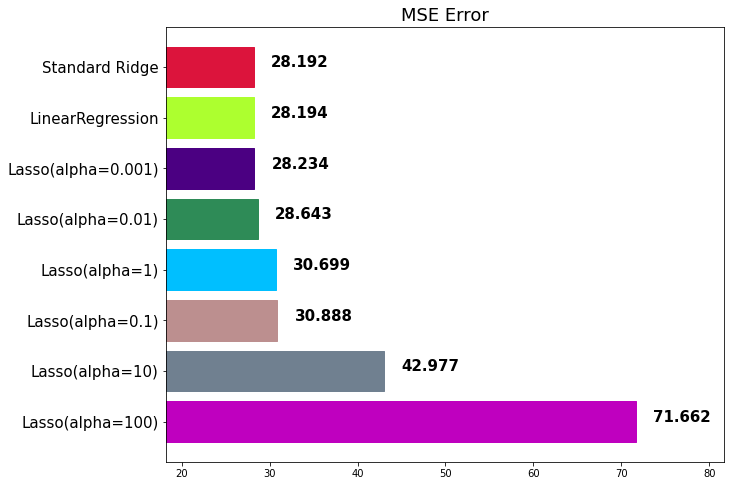

Lasso(alpha=10)

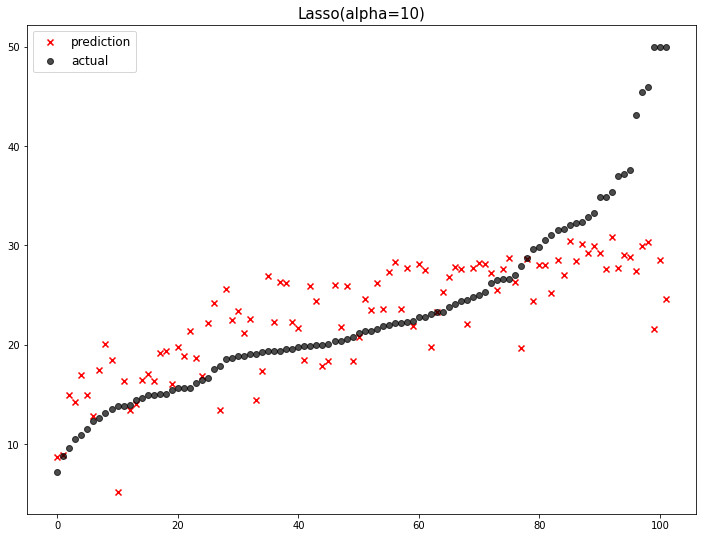

                model        mse
0    Lasso(alpha=100)  71.662293
1     Lasso(alpha=10)  42.977348
2    Lasso(alpha=0.1)  30.888208
3      Lasso(alpha=1)  30.699416
4   Lasso(alpha=0.01)  28.642732
5  Lasso(alpha=0.001)  28.233601
6    LinearRegression  28.193564
7      Standard Ridge  28.192493


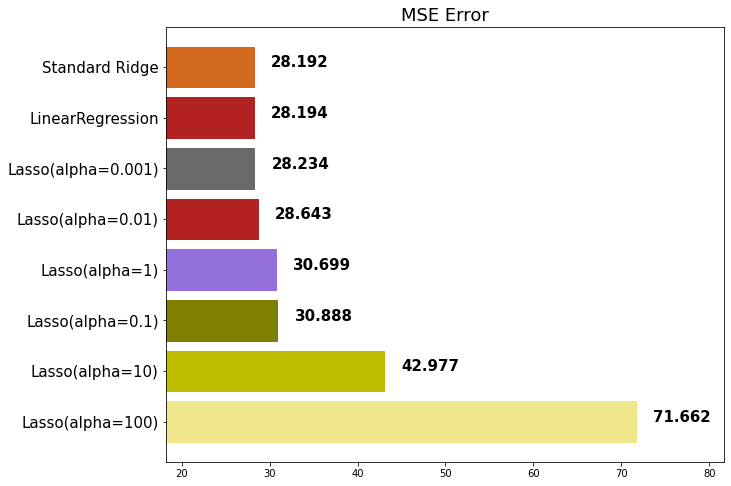

Lasso(alpha=1)

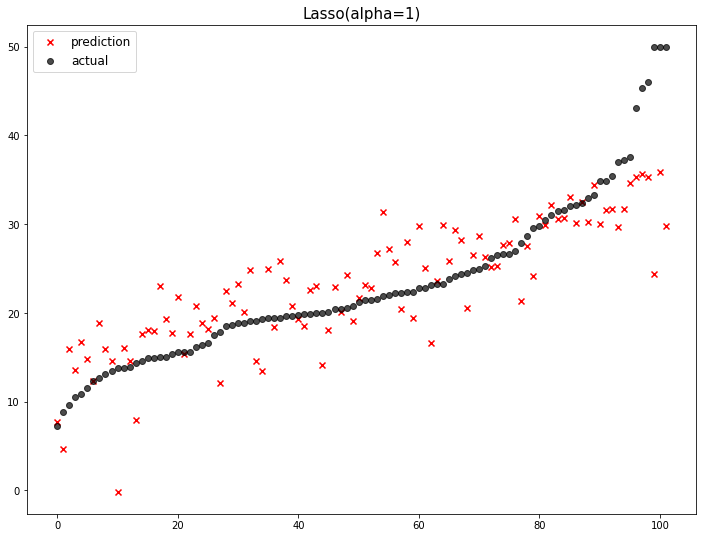

                model        mse
0    Lasso(alpha=100)  71.662293
1     Lasso(alpha=10)  42.977348
2    Lasso(alpha=0.1)  30.888208
3      Lasso(alpha=1)  30.699416
4   Lasso(alpha=0.01)  28.642732
5  Lasso(alpha=0.001)  28.233601
6    LinearRegression  28.193564
7      Standard Ridge  28.192493


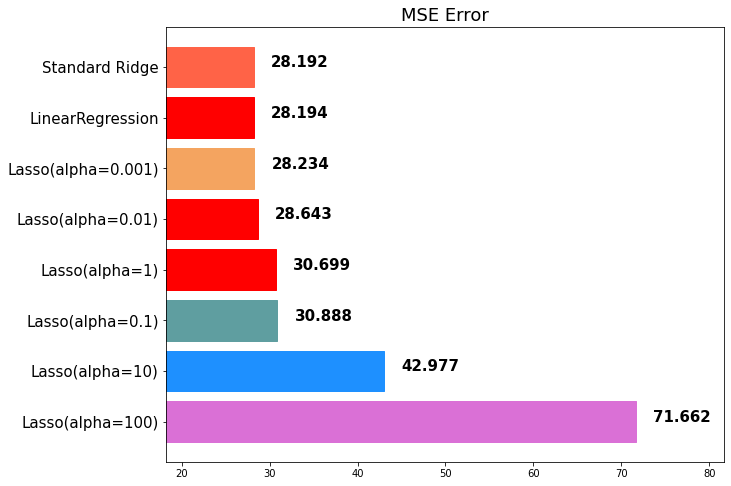

Lasso(alpha=0.1)

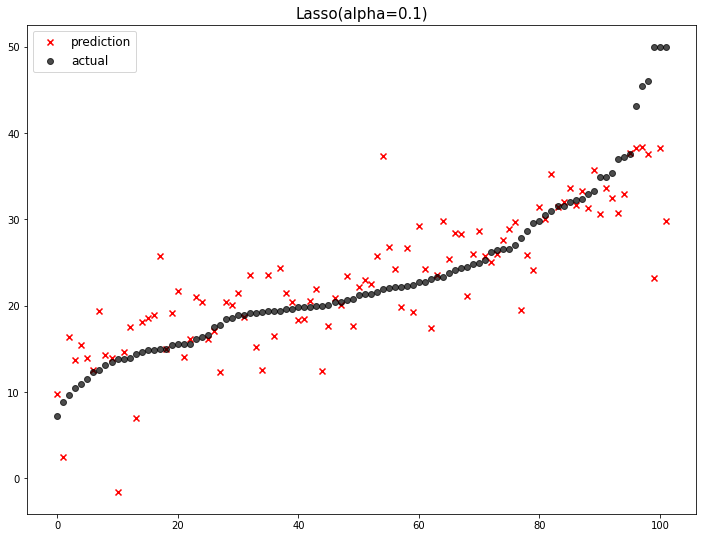

                model        mse
0    Lasso(alpha=100)  71.662293
1     Lasso(alpha=10)  42.977348
2    Lasso(alpha=0.1)  30.888208
3      Lasso(alpha=1)  30.699416
4   Lasso(alpha=0.01)  28.642732
5  Lasso(alpha=0.001)  28.233601
6    LinearRegression  28.193564
7      Standard Ridge  28.192493


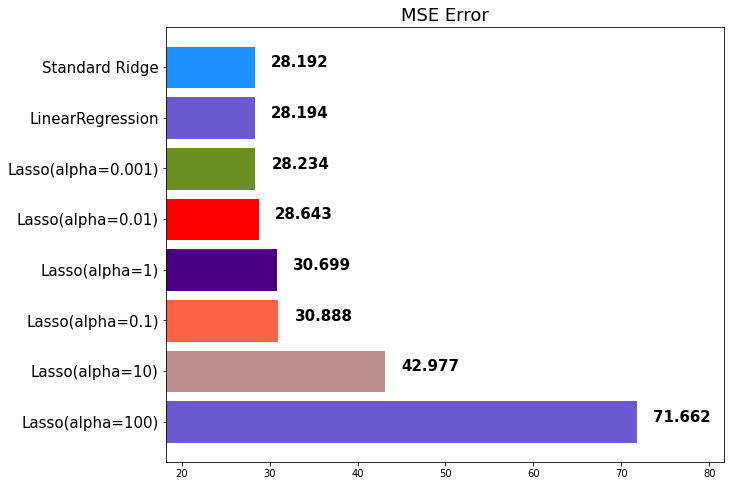

Lasso(alpha=0.01)

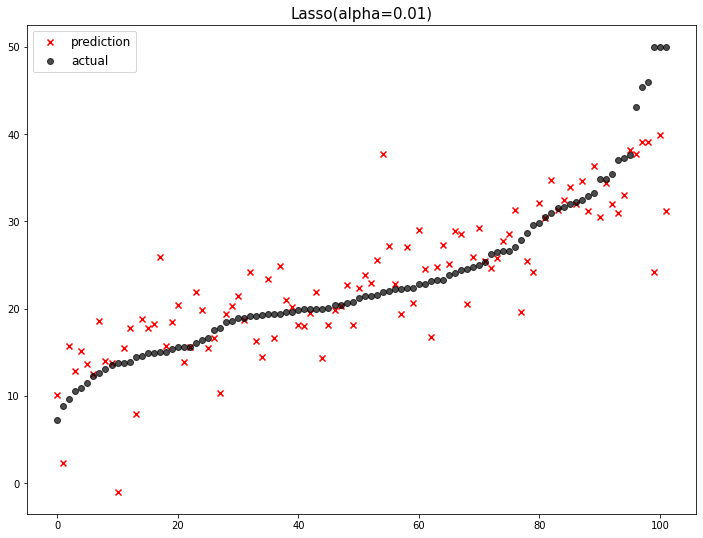

                model        mse
0    Lasso(alpha=100)  71.662293
1     Lasso(alpha=10)  42.977348
2    Lasso(alpha=0.1)  30.888208
3      Lasso(alpha=1)  30.699416
4   Lasso(alpha=0.01)  28.642732
5  Lasso(alpha=0.001)  28.233601
6    LinearRegression  28.193564
7      Standard Ridge  28.192493


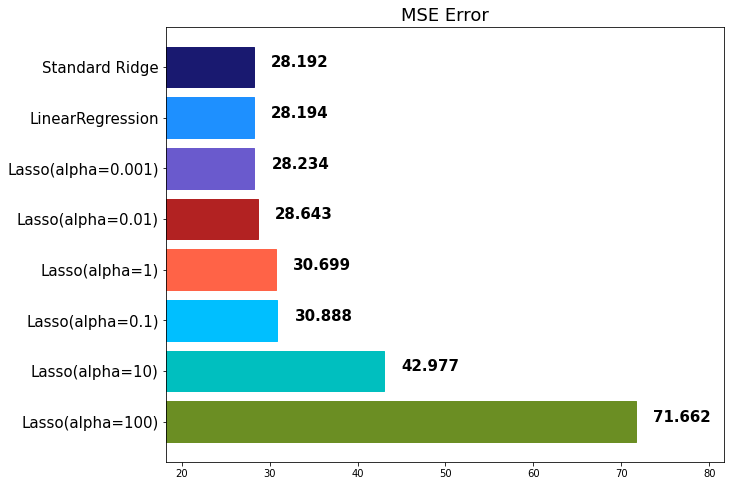

Lasso(alpha=0.001)

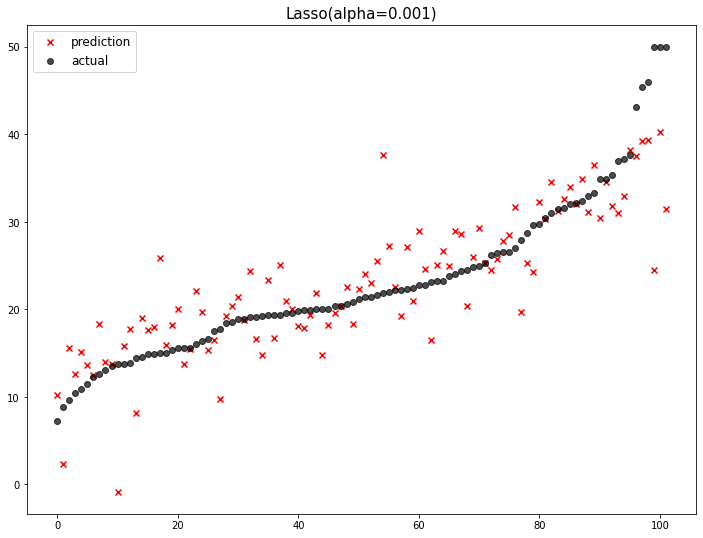

                model        mse
0    Lasso(alpha=100)  71.662293
1     Lasso(alpha=10)  42.977348
2    Lasso(alpha=0.1)  30.888208
3      Lasso(alpha=1)  30.699416
4   Lasso(alpha=0.01)  28.642732
5  Lasso(alpha=0.001)  28.233601
6    LinearRegression  28.193564
7      Standard Ridge  28.192493


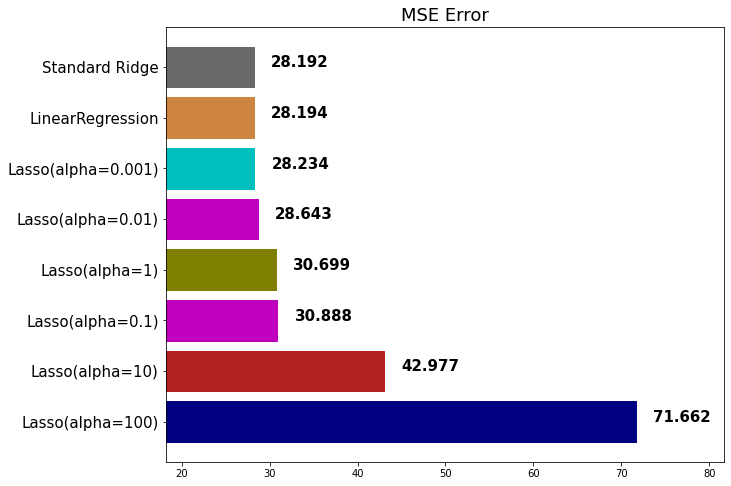

Lasso(alpha=0.0001)

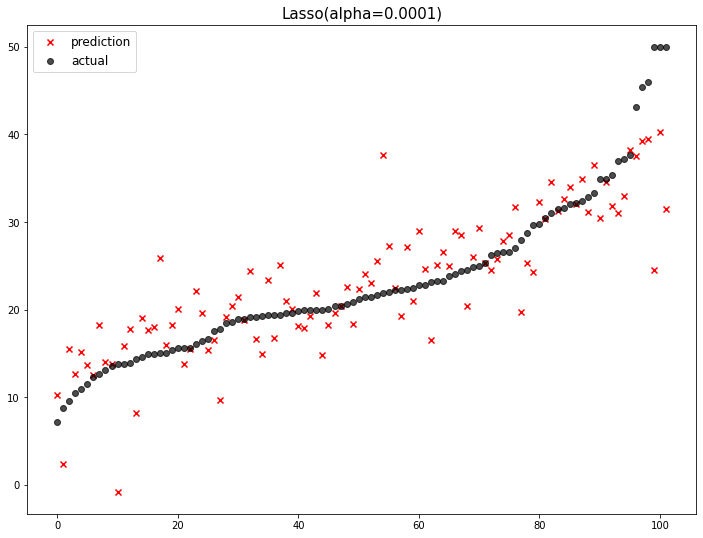

                 model        mse
0     Lasso(alpha=100)  71.662293
1      Lasso(alpha=10)  42.977348
2     Lasso(alpha=0.1)  30.888208
3       Lasso(alpha=1)  30.699416
4    Lasso(alpha=0.01)  28.642732
5   Lasso(alpha=0.001)  28.233601
6  Lasso(alpha=0.0001)  28.196557
7     LinearRegression  28.193564
8       Standard Ridge  28.192493


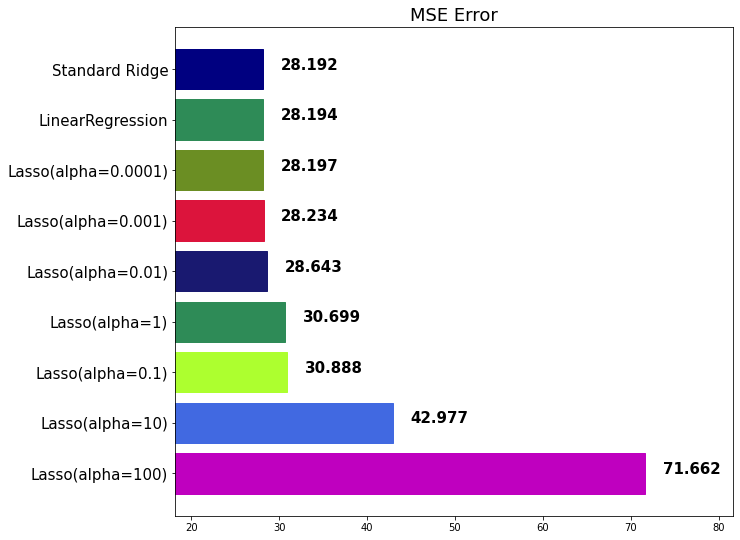

In [79]:
# 오차 세상 큼..... linear regression 이 아직 나음. 
# ridge 랑 라쏘는 별로 이번 모델에서 규제를 넣는게 도움이 안됨. 
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

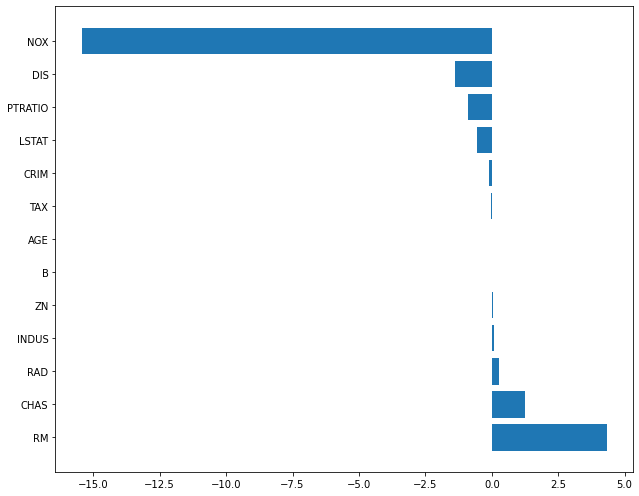

In [80]:
plot_coef(x_train.columns, lasso.coef_)

## 데이터 셋의 전처리 추가

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [64]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.556133,11.163366,11.190347,0.056931,0.55548,6.281676,68.974505,3.786204,9.509901,408.445545,18.463861,357.209084,12.825347
std,8.788241,22.973132,6.949621,0.231997,0.11639,0.704875,28.021271,2.138012,8.661394,168.499919,2.148906,91.677481,7.127718
min,0.006320,0.000000,0.460000,0.000000,0.38500,3.561000,6.000000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081960,0.000000,5.130000,0.000000,0.45200,5.887750,45.325000,2.097050,4.000000,279.000000,17.400000,376.092500,7.187500
50%,0.252775,0.000000,9.690000,0.000000,0.53800,6.201500,77.700000,3.100900,5.000000,330.000000,19.050000,391.955000,11.490000
75%,3.681942,12.500000,18.100000,0.000000,0.62400,6.616500,94.100000,5.117025,24.000000,666.000000,20.200000,396.157500,17.127500
max,88.976200,100.000000,27.740000,1.000000,0.87100,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [66]:
# 1. StandardScaler = 평균(mean) 을 0, 표준편차(std)를 1로 만들어 주는 스케일러
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(x_train)

In [67]:
# dataframe 에 넣어줘야 나옴. 아니면 에러남. 
pd.DataFrame(std_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.209154e-17,3.517538e-17,1.758769e-16,4.836615e-17,2.638154e-17,-2.054462e-15,1.055261e-16,1.143200e-16,1.055261e-16,-1.494954e-16,-1.978615e-16,-2.901969e-16,-1.099231e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.044284e-01,-4.865339e-01,-1.545933e+00,-2.456979e-01,-1.466553e+00,-3.864583e+00,-2.250169e+00,-1.225600e+00,-9.837276e-01,-1.315847e+00,-2.732149e+00,-3.897703e+00,-1.558578e+00
25%,-3.958108e-01,-4.865339e-01,-8.731211e-01,-2.456979e-01,-8.901868e-01,-5.595517e-01,-8.450305e-01,-7.910376e-01,-6.369336e-01,-7.691757e-01,-4.956850e-01,2.062320e-01,-7.919557e-01
50%,-3.763499e-01,-4.865339e-01,-2.161566e-01,-2.456979e-01,-1.503731e-01,-1.138856e-01,3.117744e-01,-3.209305e-01,-5.213356e-01,-4.661297e-01,2.730996e-01,3.794716e-01,-1.875779e-01
75%,1.433346e-02,5.825462e-02,9.954817e-01,-2.456979e-01,5.894405e-01,4.756010e-01,8.977697e-01,6.232290e-01,1.675027e+00,1.530409e+00,8.089191e-01,4.253685e-01,6.043292e-01
max,9.731866e+00,3.871774e+00,2.384328e+00,4.070039e+00,2.714254e+00,3.470619e+00,1.108585e+00,3.905795e+00,1.675027e+00,1.797803e+00,1.647593e+00,4.334775e-01,3.393036e+00


In [68]:
# round = 소숫점 2째자리 미만은 다 반올림
round(pd.DataFrame(std_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.40,-0.49,-1.55,-0.25,-1.47,-3.86,-2.25,-1.23,-0.98,-1.32,-2.73,-3.90,-1.56
25%,-0.40,-0.49,-0.87,-0.25,-0.89,-0.56,-0.85,-0.79,-0.64,-0.77,-0.50,0.21,-0.79
50%,-0.38,-0.49,-0.22,-0.25,-0.15,-0.11,0.31,-0.32,-0.52,-0.47,0.27,0.38,-0.19
75%,0.01,0.06,1.00,-0.25,0.59,0.48,0.90,0.62,1.68,1.53,0.81,0.43,0.60
max,9.73,3.87,2.38,4.07,2.71,3.47,1.11,3.91,1.68,1.80,1.65,0.43,3.39


In [70]:
# 2. MinMaxScaler = Min 값과 Max 값을 0-1 사이로 정규화 (숫자의 범위는 parameter 로 변경 가능)
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

pd.DataFrame(minmax_scaled).describe()
round(pd.DataFrame(minmax_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.039899,0.111634,0.393341,0.056931,0.350782,0.526854,0.669942,0.238843,0.369996,0.422606,0.623815,0.899917,0.314762
std,0.098778,0.229731,0.254752,0.231997,0.239485,0.136498,0.298099,0.195120,0.376582,0.321565,0.228607,0.231170,0.202205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.171188,0.000000,0.137860,0.450571,0.418351,0.084687,0.130435,0.175573,0.510638,0.947533,0.154823
50%,0.002770,0.000000,0.338343,0.000000,0.314815,0.511328,0.762766,0.176301,0.173913,0.272901,0.686170,0.987531,0.276879
75%,0.041313,0.125000,0.646628,0.000000,0.491770,0.591692,0.937234,0.360298,1.000000,0.914122,0.808511,0.998128,0.436809
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.04,0.11,0.39,0.06,0.35,0.53,0.67,0.24,0.37,0.42,0.62,0.90,0.31
std,0.10,0.23,0.25,0.23,0.24,0.14,0.30,0.20,0.38,0.32,0.23,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.14,0.45,0.42,0.08,0.13,0.18,0.51,0.95,0.15
50%,0.00,0.00,0.34,0.00,0.31,0.51,0.76,0.18,0.17,0.27,0.69,0.99,0.28
75%,0.04,0.12,0.65,0.00,0.49,0.59,0.94,0.36,1.00,0.91,0.81,1.00,0.44
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [72]:
# 3. RobustScaler = 중앙값(Median)이 0, IQR(InterQuartile Range)이 1이 되도록 변환
# Median: [1,2,3,4,5,6,7,8,9] 에서 가운데 있는 값이 중앙값.
# https://wikidocs.net/89704

robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

pd.DataFrame(robust_scaled).describe()
round(pd.DataFrame(robust_scaled).describe(),2)
round(pd.DataFrame(robust_scaled).median(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,4.040000e+02,404.000000,404.000000,404.000000,4.040000e+02,404.000000
mean,9.176038e-01,0.893069,0.115678,0.056931,0.101629,0.110018,-0.178893,2.269236e-01,0.225495,0.202702,-0.209335,-1.731668e+00,0.134341
std,2.441190e+00,1.837851,0.535823,0.231997,0.676684,0.967239,0.574501,7.079570e-01,0.433070,0.435400,0.767466,4.569025e+00,0.717074
min,-6.846006e-02,0.000000,-0.711642,0.000000,-0.889535,-3.623328,-1.470015,-6.396742e-01,-0.200000,-0.369509,-2.303571,-1.951832e+01,-0.981891
25%,-4.744884e-02,0.000000,-0.351581,0.000000,-0.500000,-0.430532,-0.663762,-3.324034e-01,-0.050000,-0.131783,-0.589286,-7.905557e-01,-0.432847
50%,7.711388e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.350891e-17,0.000000,0.000000,0.000000,-1.416402e-15,0.000000
75%,9.525512e-01,1.000000,0.648419,0.000000,0.500000,0.569468,0.336238,6.675966e-01,0.950000,0.868217,0.410714,2.094443e-01,0.567153
max,2.464552e+01,8.000000,1.391673,1.000000,1.936047,3.462779,0.457201,2.988634e+00,0.950000,0.984496,1.053571,2.464490e-01,2.564386


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.92,0.89,0.12,0.06,0.10,0.11,-0.18,0.23,0.23,0.20,-0.21,-1.73,0.13
std,2.44,1.84,0.54,0.23,0.68,0.97,0.57,0.71,0.43,0.44,0.77,4.57,0.72
min,-0.07,0.00,-0.71,0.00,-0.89,-3.62,-1.47,-0.64,-0.20,-0.37,-2.30,-19.52,-0.98
25%,-0.05,0.00,-0.35,0.00,-0.50,-0.43,-0.66,-0.33,-0.05,-0.13,-0.59,-0.79,-0.43
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
75%,0.95,1.00,0.65,0.00,0.50,0.57,0.34,0.67,0.95,0.87,0.41,0.21,0.57
max,24.65,8.00,1.39,1.00,1.94,3.46,0.46,2.99,0.95,0.98,1.05,0.25,2.56


0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7    -0.0
8     0.0
9     0.0
10    0.0
11   -0.0
12    0.0
dtype: float64

In [73]:
# 파이프라인
from sklearn.pipeline import make_pipeline

In [75]:
# 파이프라인 만들때 기본적으로 스탠다드 스켈러를 적용하고 거기에 알파값 0.001 적용
# standardScaler + Ridge Model 정의
ridge_pipeline = make_pipeline(
            StandardScaler(),
            Ridge(alpha=0.001))

In [76]:
# fit + predict
ridge_pred = ridge_pipeline.fit(x_train, y_train).predict(x_test)

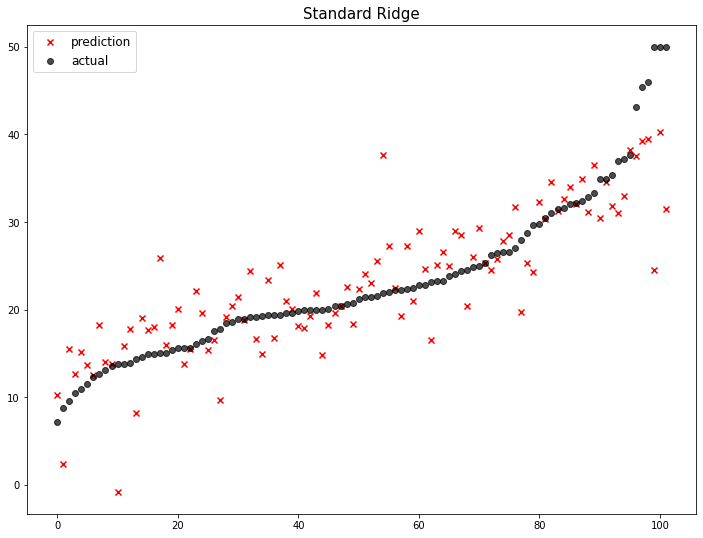

                model        mse
0    Lasso(alpha=100)  71.662293
1     Lasso(alpha=10)  42.977348
2    Lasso(alpha=0.1)  30.888208
3      Lasso(alpha=1)  30.699416
4   Lasso(alpha=0.01)  28.642732
5  Lasso(alpha=0.001)  28.233601
6    LinearRegression  28.193564
7      Standard Ridge  28.192493


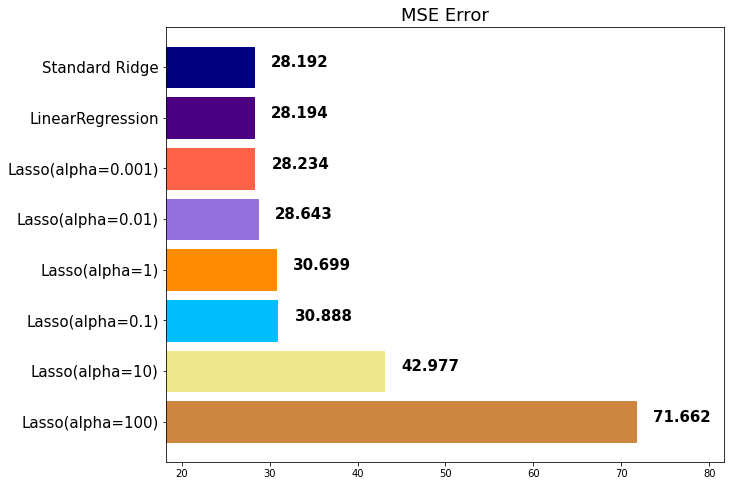

In [77]:
# 결과가 조금 나음
mse_eval('Standard Ridge', ridge_pred, y_test)

## 앙상블 (Ensemble)

심사위원 같은거임: 모델을 만들고 전체 예측을 하고 평가

여러개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법 
-> 여러개의 모델을 정의하고 모델의 예측 값을 평균해서 예측

앙상블 기법의 대표적인 종류
* 보팅(Voting) : 투표를 통해 결과 도출
* 배깅(Bagging) : 샘플 중복 생성해서 결과 도출 
    --> Random Forest( Basic Model: DecisionTree) 디시전 트리의 배깅의 대표 모델이 랜덤포레스트
* 부스팅 (Boosting) : 이전 오차를 보완하면서 가중치를 업데이트
* 스태킹(Stacking) : 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한번 예측 

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
# Poly ElasticNet
poly_pipeline = make_pipeline(
        PolynomialFeatures(degree=2, include_bias = False),
        StandardScaler(),
        ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [88]:
# 성능이 조금 좋음. 위에 것들 보다 PolyElasticNet 이. 
# . 아니고 _ : poly_pipeline
# . 을 기점으로 poly 만 인식하기 때문에 poly 자체가 이름이 되서 define 되어야만 실행되는 객체가 됨. 
poly_pred = poly.pipeline.fit(x_train,y_train).predict(x_test)
mse_eval("Poly ElasticNet", poly_pred, y_test)

NameError: name 'poly' is not defined

C:\Users\jun\miniconda3\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.96875980430741, tolerance: 3.4227182475247524
  positive)


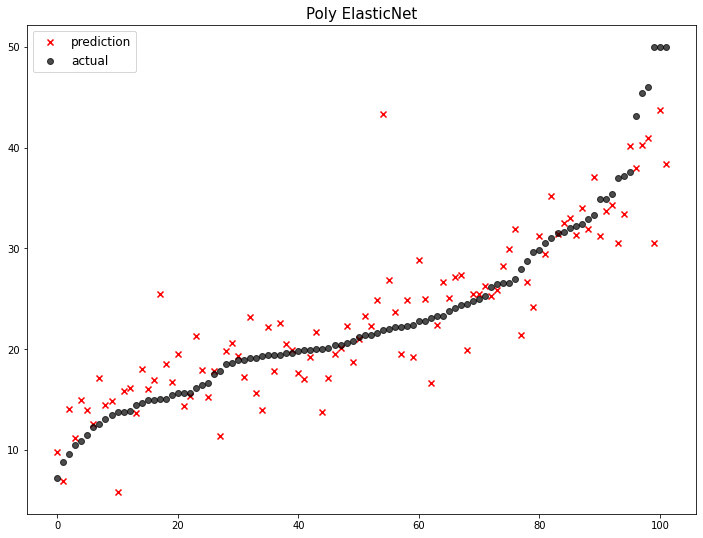

                 model        mse
0     Lasso(alpha=100)  71.662293
1      Lasso(alpha=10)  42.977348
2     Lasso(alpha=0.1)  30.888208
3       Lasso(alpha=1)  30.699416
4    Lasso(alpha=0.01)  28.642732
5   Lasso(alpha=0.001)  28.233601
6  Lasso(alpha=0.0001)  28.196557
7     LinearRegression  28.193564
8       Standard Ridge  28.192493
9      Poly ElasticNet  20.219678


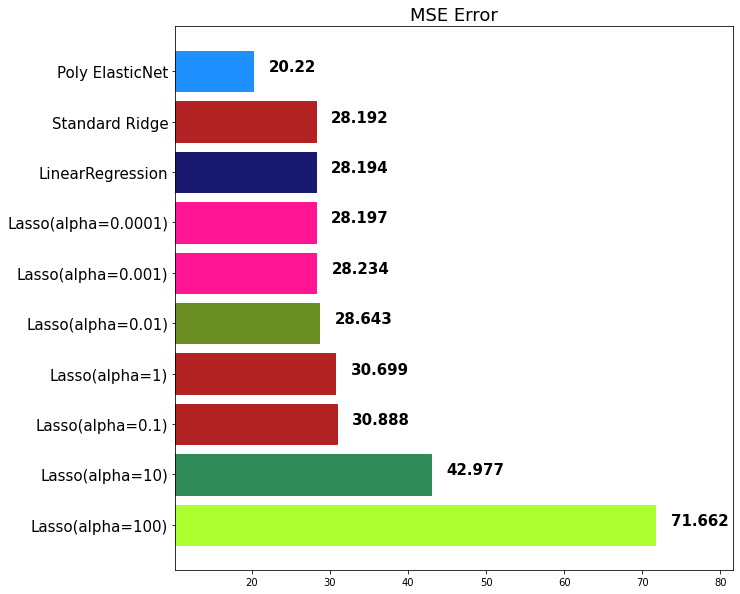

In [89]:
poly_pred = poly_pipeline.fit(x_train,y_train).predict(x_test)
mse_eval("Poly ElasticNet", poly_pred, y_test)

앙상블은 서로 특성이 다른 걸 앙상블 해야 잘됨

ex) 고양이를 잘 찾는데 개를 못찾는거 + 고양이는 못찾는데 개를 잘 찾는 거 = 고양이 , 개 두개다 잘 찾는다. 이것이 앙상블



## Voting - 회귀

다른 알고리즘 모델을 조합해서 예측하는 모델

In [96]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [97]:
from sklearn.linear_model import LinearRegression

# model 정의
# n_jobs = -1 이면 CPU 를 모두 사용
linear_reg = LinearRegression(n_jobs=-1)

# training model
linear_reg.fit(x_train, y_train)

prediction = linear_reg.predict(x_test)

LinearRegression(n_jobs=-1)

In [98]:
# Tuple in the List
single_models = [('linear_reg', linear_reg), # linear_reg = LinearRegression(n_jobs=-1) 이거 때문에 위에서 복사해서 가져온것
                ('ridge', ridge),
                ('lasso', lasso),
                ('poly_pipeline', poly_pipeline)
                ]

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=0.001)),
                            ('lasso', Lasso(alpha=0.0001)),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))]))],
                n_jobs=-1)

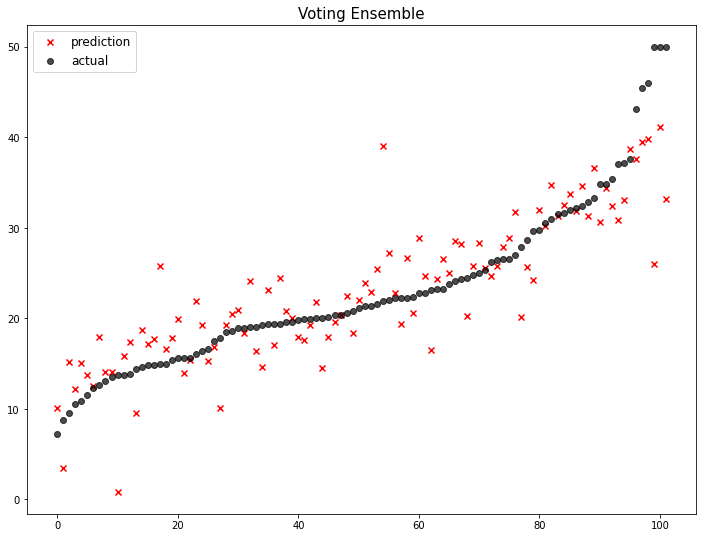

                  model        mse
0      Lasso(alpha=100)  71.662293
1       Lasso(alpha=10)  42.977348
2      Lasso(alpha=0.1)  30.888208
3        Lasso(alpha=1)  30.699416
4     Lasso(alpha=0.01)  28.642732
5    Lasso(alpha=0.001)  28.233601
6   Lasso(alpha=0.0001)  28.196557
7      LinearRegression  28.193564
8        Standard Ridge  28.192493
9       Voting Ensemble  25.557945
10      Poly ElasticNet  20.219678


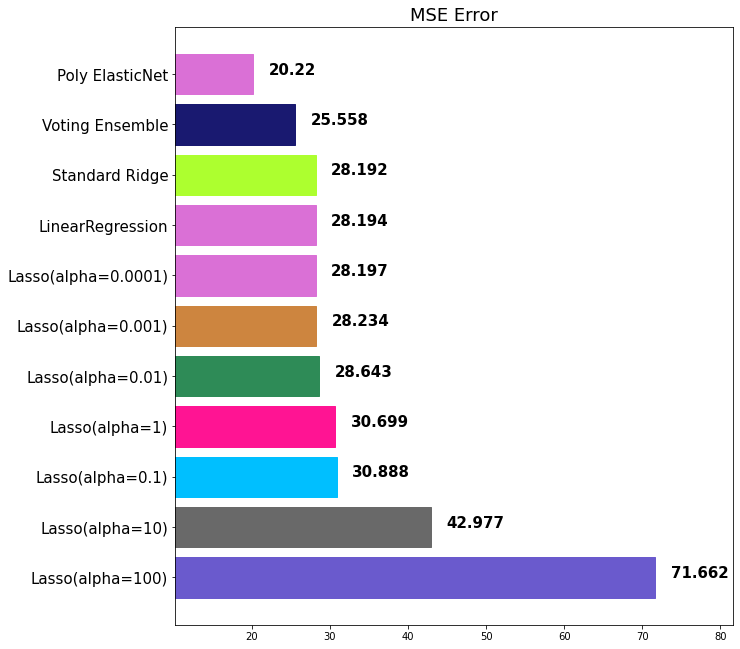

In [99]:
# Voting 모델 정의 
VotingRegressor = VotingRegressor(single_models, n_jobs = -1)

# 학습
VotingRegressor.fit(x_train, y_train)

# predict
voting_pred = VotingRegressor.predict(x_test)

# plot
mse_eval('Voting Ensemble', voting_pred, y_test)